In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# data = data.set_index('Customer')
data.columns = data.columns.str.lower().str.replace(" ", "_")
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# Get Numerical values
numerical_df = data.select_dtypes('number')
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [5]:
print(type(numerical_df))

<class 'pandas.core.frame.DataFrame'>


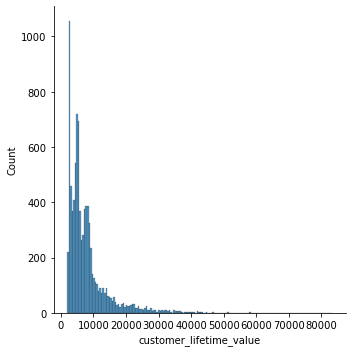

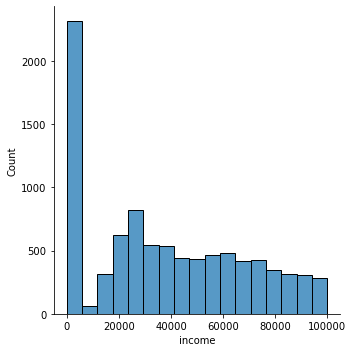

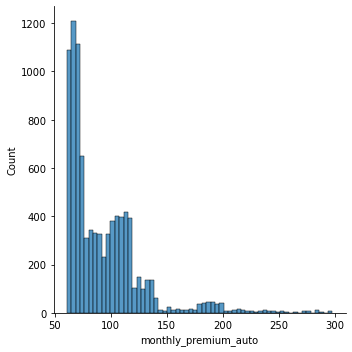

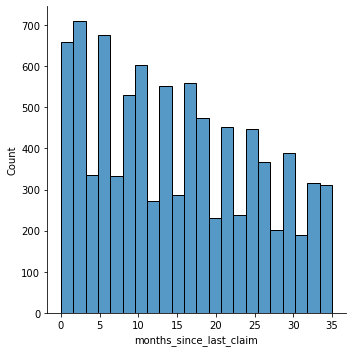

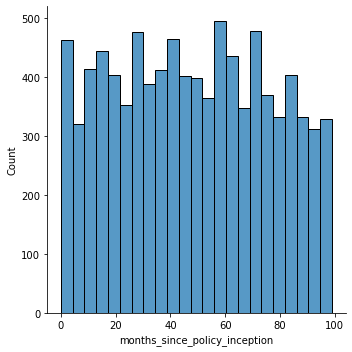

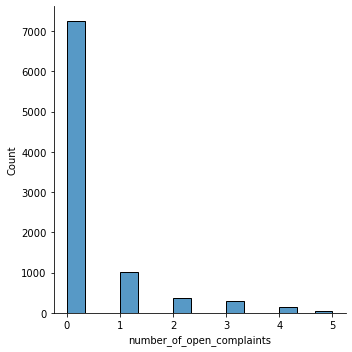

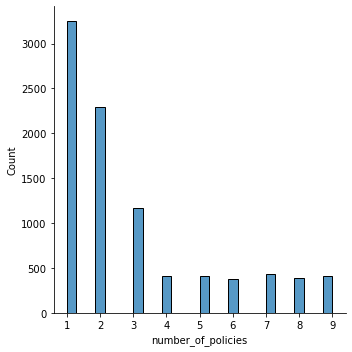

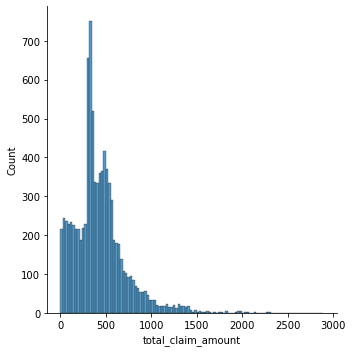

In [6]:
# Do the variables fit the normal or exponential distribution?
# I would say that they fit more the exponential distribution, apart from the total claim amount, which shows
# already some data close to x=0, then grows, and then dropps again
for col in numerical_df:
    sns.displot(numerical_df[col])
    plt.show

#### Do the scaling techniques seen so far change the result?

In [7]:
# # Splitting data in X, y
# X = numerical_df.drop('total_claim_amount', axis=1).astype('int')
# y = numerical_df['total_claim_amount'].astype('int')

# # train_test_split
# # Normalization should be applied after the split, and only on train data! (Not for BoxCox)
# # For Normalizer => you have to do so
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### BoxCox
Coming back to it later

In [11]:
# This is not working, keep receiving an error
from scipy.stats import boxcox 
import scipy.stats as stats

# From Felipe
def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

df_boxcox, _ci = boxcox_transform(numerical_df)
df_boxcox

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.688843,1245.725613,-1.122127e+28,8.587794,1.974649,-31.786898,-0.050447,30.939946
1,0.697309,1165.840139,-9.745620e+27,4.365036,16.585033,-31.786898,0.369142,53.109818
2,0.701486,1141.968191,-9.313425e+27,5.672909,15.321697,-31.786898,-0.470049,37.645537
3,0.697993,1165.840139,-9.365593e+27,5.672909,23.239789,-31.786898,0.321830,36.399737
4,0.689038,1070.360434,-1.088256e+28,4.075005,17.202529,-31.786898,-0.050447,18.038870
...,...,...,...,...,...,...,...,...
9129,0.704734,1446.091117,-1.088256e+28,5.672909,29.429972,-31.786898,-0.470049,21.905574
9130,0.690052,696.177309,-1.046702e+28,4.644216,11.963177,-31.786898,-0.050447,30.708229
9131,0.698470,1165.840139,-1.013445e+28,3.123949,14.999490,0.063804,-0.470049,44.483386
9132,0.697874,702.763582,-9.672968e+27,8.947829,0.661735,-31.786898,-0.111118,41.596240


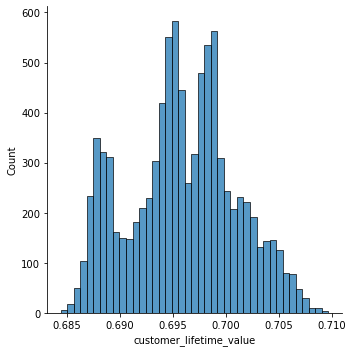

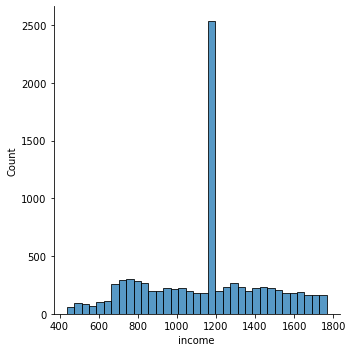

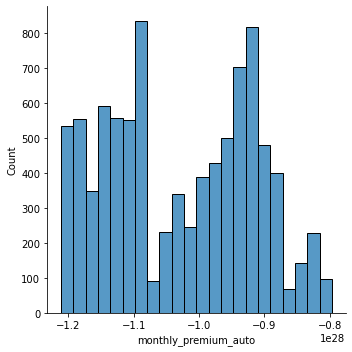

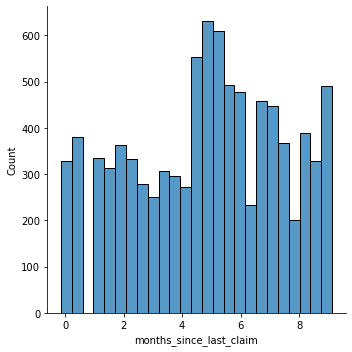

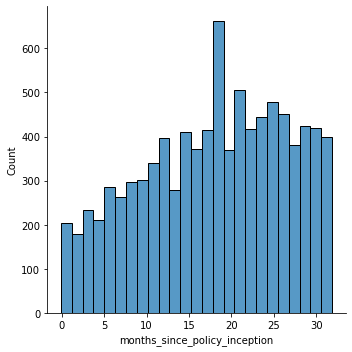

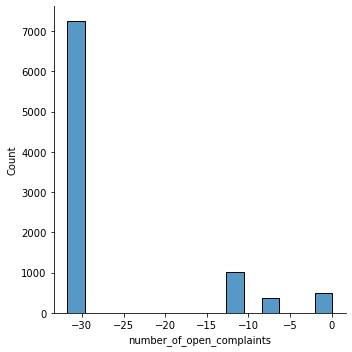

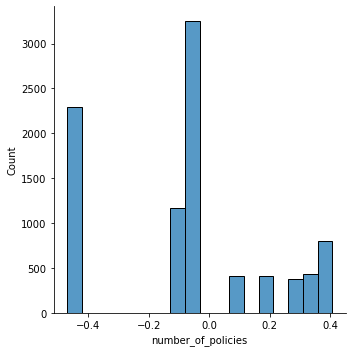

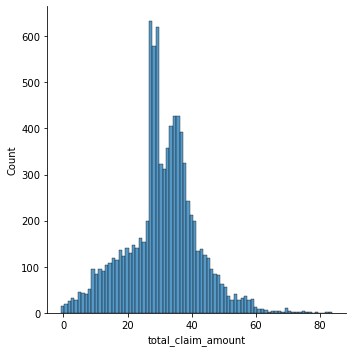

In [13]:
for col in df_boxcox:
    sns.displot(df_boxcox[col])
    plt.show
    
# It helped centralizing the distribution, but in some graphs there are some double spikes around the centre

### Log 

In [15]:
def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

df_log = numerical_df.copy()

In [17]:
for col in df_log:
    df_log[col] = df_log[col].apply(log_transform).fillna(df_log[col].mean())

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: divide by zero encountered in double_scalars
  norm = n_equal_bins / _unsigned_subtract(last_edge, first_edge)
/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:851: RuntimeWarning: invalid value encountered in multiply
  f_indices = _unsigned_subtract(tmp_a, first_edge) * norm


IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 2

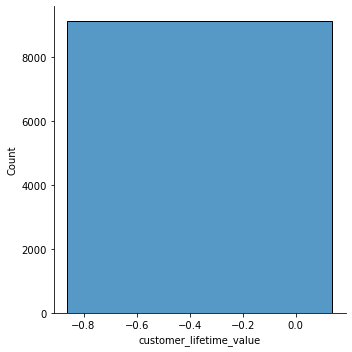

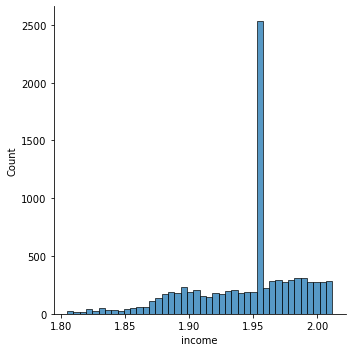

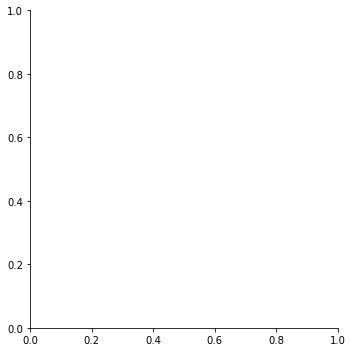

In [19]:
# This didn't work properly, distributions don't look good
for col in df_log:
    sns.displot(df_log[col])
    plt.show